In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from tqdm import tqdm
import torch
from torch import nn
from torchvision.datasets import MNIST
from torch import optim

In [2]:
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

In [3]:
def plot_grid(images, rows, cols, figsize=(10, 10)):
    sample_ids = np.random.randint(0, images.shape[0], size=rows*cols)
    sample = images[sample_ids]
    f, ax_arr = plt.subplots(rows, cols, figsize=figsize)
    plt.set_cmap(plt.cm.Greys_r)
    index = 0
    for i in range(rows):
        for j in range(cols):
            ax_arr[i, j].imshow(sample[index])
            ax_arr[i, j].axis('off')
            index +=1
    plt.show()
    plt.close()

In [4]:
mnist = MNIST('.', download=True)
x_train = mnist.data
x_train = x_train.float() / 255.0
x_train = 2 * (x_train - 0.5)
print('Max value:', x_train.max())
print('Min value:', x_train.min())
print('Loaded dataset tensor size:', x_train.shape)
dataSize = x_train.shape[0]
dimSize = x_train.shape[1] * x_train.shape[2]

Max value: tensor(1.)
Min value: tensor(-1.)
Loaded dataset tensor size: torch.Size([60000, 28, 28])


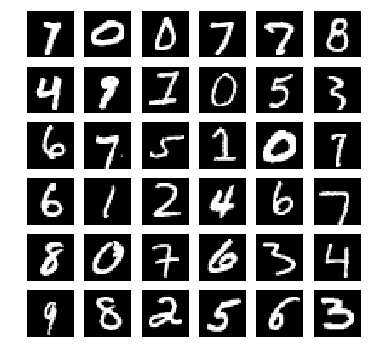

In [5]:
plot_grid(x_train.numpy(), 6, 6, figsize=(6, 6))

### Define Generator Network

In [6]:
n_hidden = 128
z_dim = 100

# Generator
model_g = nn.Sequential(
                nn.Linear(z_dim, n_hidden),
                nn.LeakyReLU(0.01),
                nn.Linear(n_hidden, 28*28),
                nn.Tanh()
            ).to(DEVICE)

### Define Discriminator Network

In [7]:
model_d = nn.Sequential(
                nn.Linear(28*28, n_hidden),
                nn.LeakyReLU(0.01),
                nn.Linear(n_hidden, 2)
            ).to(DEVICE)

### Training

In [8]:
# Hyperparameters
batchSize = 32
batchSizeHalf = batchSize / 2

# Total batches that can be created from the training set
nBatches = math.floor(dataSize / batchSizeHalf)

In [9]:
def get_real_batch(batchData, batchId, shuffle, batchSize):
    start_idx = int(batchId * batchSize)
    end_idx = int((batchId + 1) * batchSize)
    indices = shuffle[start_idx:end_idx]
    num_samples = indices.shape[0]
    return batchData[indices].view(num_samples, dimSize)

In [10]:
def get_fake_batch(generator, latent_dim, batchSize, device):
    z = torch.rand(batchSize, latent_dim) - 0.5
    fakes = generator(z.to(device))
    return fakes

In [11]:
optim_g = optim.Adagrad(model_g.parameters(), lr=0.1)
optim_d = optim.Adagrad(model_d.parameters(), lr=0.1)

criterion = nn.CrossEntropyLoss()
maxEpoch = 20

100%|██████████| 3750/3750 [00:10<00:00, 358.89it/s]


Epoch 1  out of 20  done !!!


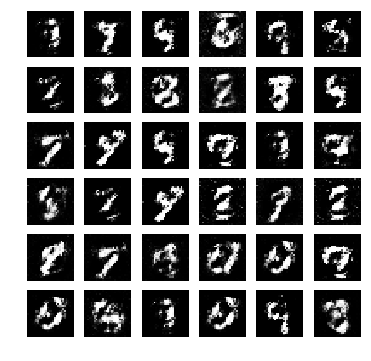

100%|██████████| 3750/3750 [00:10<00:00, 350.25it/s]


Epoch 2  out of 20  done !!!


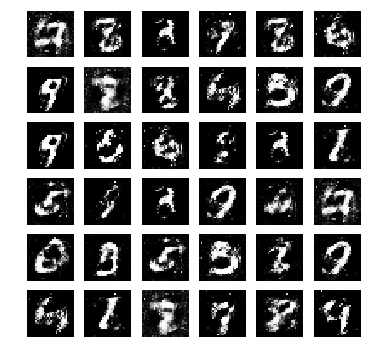

100%|██████████| 3750/3750 [00:10<00:00, 355.54it/s]


Epoch 3  out of 20  done !!!


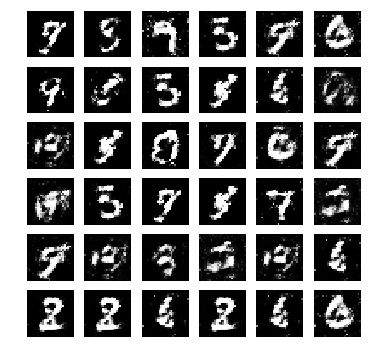

100%|██████████| 3750/3750 [00:10<00:00, 358.27it/s]


Epoch 4  out of 20  done !!!


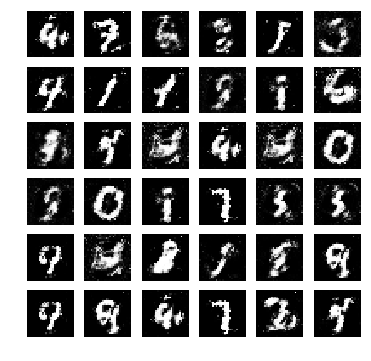

100%|██████████| 3750/3750 [00:10<00:00, 351.49it/s]


Epoch 5  out of 20  done !!!


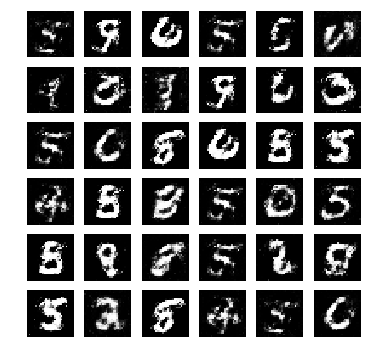

100%|██████████| 3750/3750 [00:10<00:00, 344.87it/s]


Epoch 6  out of 20  done !!!


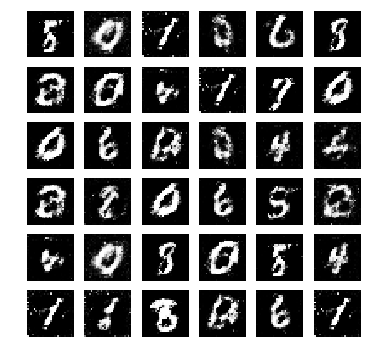

100%|██████████| 3750/3750 [00:10<00:00, 352.44it/s]


Epoch 7  out of 20  done !!!


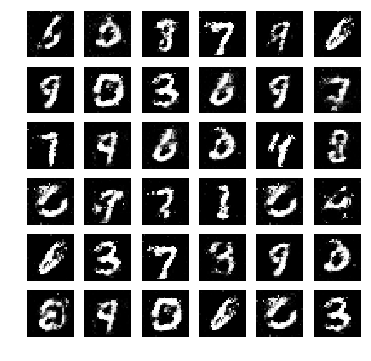

100%|██████████| 3750/3750 [00:11<00:00, 333.36it/s]


Epoch 8  out of 20  done !!!


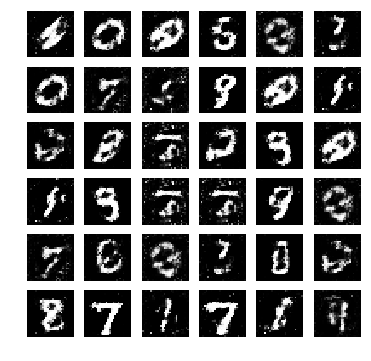

100%|██████████| 3750/3750 [00:11<00:00, 329.59it/s]


Epoch 9  out of 20  done !!!


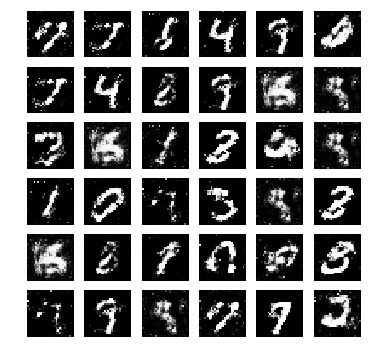

100%|██████████| 3750/3750 [00:11<00:00, 333.79it/s]


Epoch 10  out of 20  done !!!


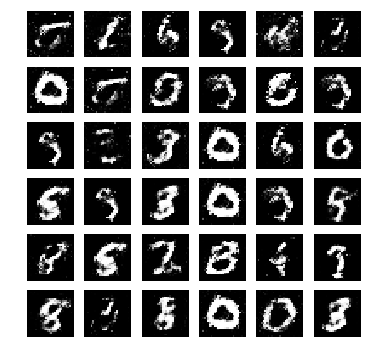

100%|██████████| 3750/3750 [00:10<00:00, 342.11it/s]


Epoch 11  out of 20  done !!!


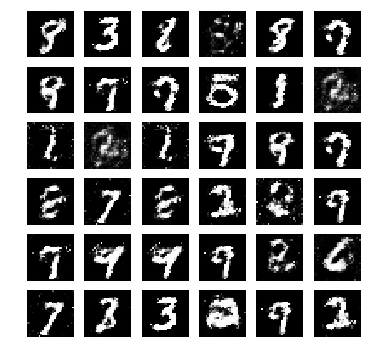

100%|██████████| 3750/3750 [00:11<00:00, 330.76it/s]


Epoch 12  out of 20  done !!!


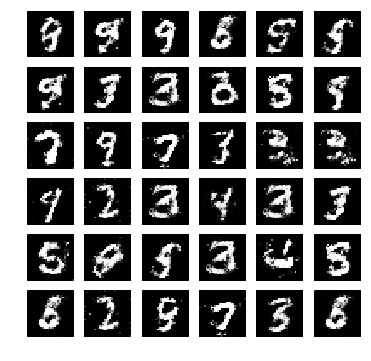

100%|██████████| 3750/3750 [00:11<00:00, 340.04it/s]


Epoch 13  out of 20  done !!!


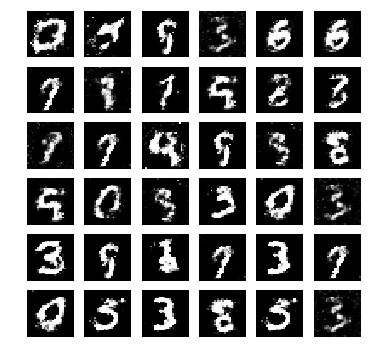

100%|██████████| 3750/3750 [00:11<00:00, 339.56it/s]


Epoch 14  out of 20  done !!!


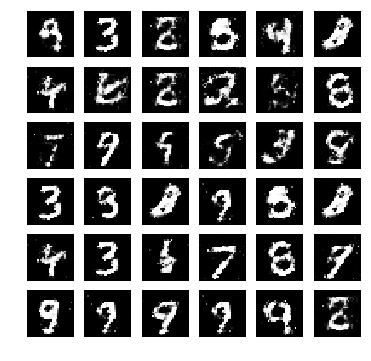

100%|██████████| 3750/3750 [00:10<00:00, 357.42it/s]


Epoch 15  out of 20  done !!!


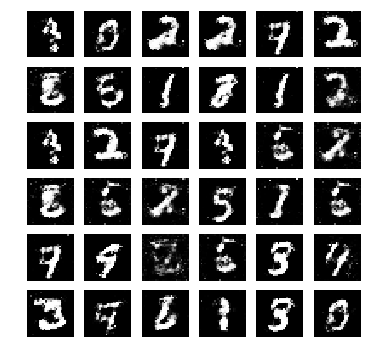

100%|██████████| 3750/3750 [00:10<00:00, 355.62it/s]


Epoch 16  out of 20  done !!!


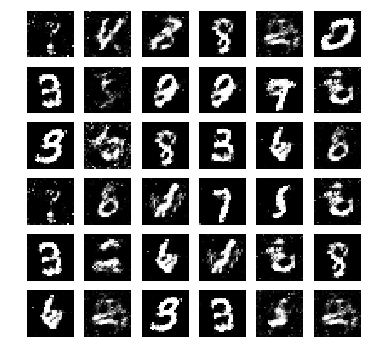

100%|██████████| 3750/3750 [00:10<00:00, 351.67it/s]


Epoch 17  out of 20  done !!!


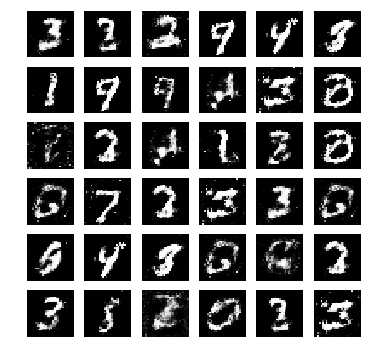

100%|██████████| 3750/3750 [00:10<00:00, 352.98it/s]


Epoch 18  out of 20  done !!!


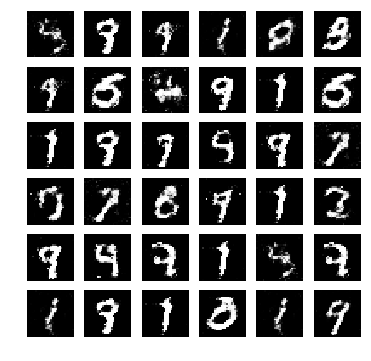

100%|██████████| 3750/3750 [00:10<00:00, 348.24it/s]


Epoch 19  out of 20  done !!!


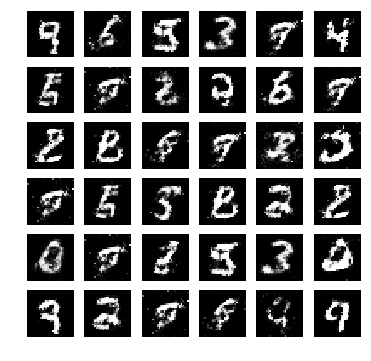

100%|██████████| 3750/3750 [00:10<00:00, 348.15it/s]


Epoch 20  out of 20  done !!!


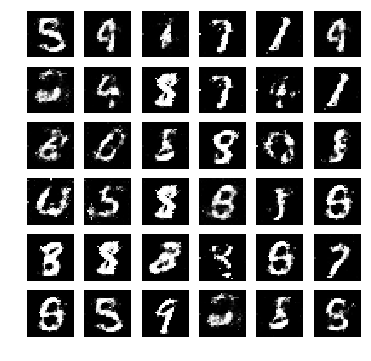

In [12]:
shuffle = np.arange(dataSize)

for epochId in range(maxEpoch):
    np.random.shuffle(shuffle)
    
    for batch_id in tqdm(range(nBatches)):
        # Train the discriminator
        x_real = get_real_batch(x_train, batch_id, shuffle, batchSizeHalf).to(DEVICE)
        y_real = torch.ones(x_real.shape[0]).long().to(DEVICE)
        
        x_fake = get_fake_batch(model_g, z_dim, x_real.shape[0], DEVICE)
        y_fake = torch.zeros(x_real.shape[0]).long().to(DEVICE)
        
        X, Y = torch.cat([x_real, x_fake], dim=0), torch.cat([y_real, y_fake], dim=0)
        
        optim_d.zero_grad()
        output_d = model_d(X)
        d_loss = criterion(output_d, Y)
        d_loss.backward()
        optim_d.step()
        
        # Train the generator 
        z = torch.rand(batchSize, z_dim) - 0.5
        labels = torch.ones(batchSize).long()
        output_g = model_g(z.to(DEVICE))
        output_d = model_d(output_g)
        optim_g.zero_grad()
        g_loss = criterion(output_d, labels.to(DEVICE))
        g_loss.backward()
        optim_g.step()
    
    print('Epoch', epochId + 1, ' out of', maxEpoch, ' done !!!')
    noise = torch.rand(36, z_dim) - 0.5
    randImgs = model_g(noise.to(DEVICE))
    randImgs = randImgs.detach().cpu().view(36, 28, 28)
    plot_grid(randImgs.numpy(), 6, 6, figsize=(6, 6))